<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/AI_he_chuyen_gia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e634ce4c170d8976b89f9510a8932291d5d37a5657e682aacf76b152e20ecf7e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


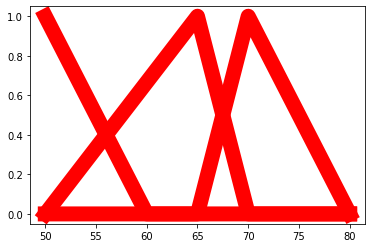

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
high = fuzz.trimf(x,[65,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth = 15, label='slow')
plt.plot(x,medium,'r',linewidth = 15, label='slow')
plt.plot(x,high,'r',linewidth = 15, label='slow')

26.666666666666657


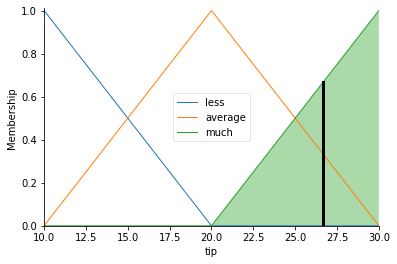

In [19]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1),'food') #ham input
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5]) #universe lay gia tri cua nparray o tren
food['average']=fuzz.trimf(food.universe,[0,5,10]) 
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

#food.view()
#service.view()
#tip.view()
#service['average'].view()

#tạo luật 
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less']) #cú pháp này hoạt động giống if
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['less'])
rule6=ctrl.Rule(food['average']&service['good'],tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 10
tipping.input['service']= 10 
#2 cái input này là giá trị input vào để đưa ra giá trị tip cuối cùng, trong kỹ thuật thì chỗ này lấy giá trị analog từ cảm biến
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)